<a href="https://colab.research.google.com/github/tanpharamut/KKU_data_mining/blob/master/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs #import

In [ ]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=6) # สร้างชดข้อมูลโดยคำสั่ง make_blobs โดยมีจำนวน 300 ตัว 3 กลุ่ม 2 มิติ

In [ ]:
X.shape #เรียกดูข้อมุลในรูปของปริมาณ

(300, 2)

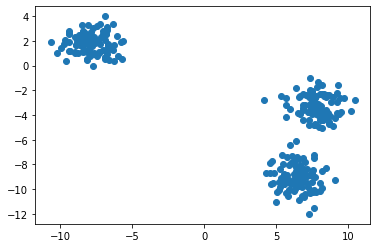

In [ ]:
from matplotlib import pyplot as plt # import
plt.scatter(X[:,0],X[:,1]) # เรียกดูกราฟ

## Import

In [ ]:
from sklearn.cluster import KMeans

## Define

In [ ]:
KMclust = KMeans(n_clusters=5) #สร้างตัวแปร KMclust เพื่อเก็บตัวกำหนดค่า KMean ที่มี n_clusters = 5 กลุ่ม

## Train

In [ ]:
KMclust.fit(X) #fit

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Predict

In [ ]:
label = KMclust.predict(X) #สร้างตัวแปร label เพื่อทำนายการแบ่งกลุ่ม

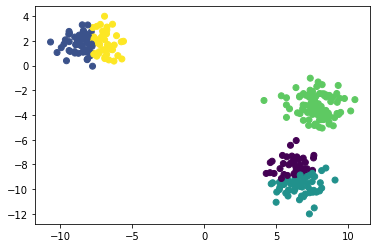

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=label) #เรียกดูกราฟ Scatter เพื่อดูการแบ่งกลุ่ม

## Color quantization ()

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # เชื่อมต่อ drive เพื่อดึงข้อมูล

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/DWDM_material'#สร้างตัวแปร path เพื่อเก็บ ตัวที่อยู่ของข้อมูลภายใน drive

In [ ]:
import cv2 #import 
import os

In [ ]:
img = cv2.imread(os.path.join(path,'original.jpg')) #สร้างตัวแปร img เพื่อเก็บข้อมูลภาพ

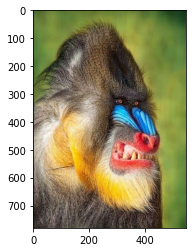

In [ ]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img) #เรียกดูภาพ

In [ ]:
RGB_img.shape #เรียกดูค่าสีทั้งหมดในภาพเป็นปริมาณ

(780, 547, 3)

## count unique colors

In [ ]:
import numpy as np # import

In [ ]:
np.unique(RGB_img).shape 

(256,)

## Use K-means to reduce color from 256 colors to 8 colors

In [ ]:
#Define
myQuantize = KMeans(n_clusters=8) # 8 กลุ่ม

In [ ]:
img_row = np.reshape(RGB_img,(780*547,3))
img_row #เรียกดูค่าสีในภาพในรูปของ array

array([[ 66, 104,  55],
       [ 67, 105,  56],
       [ 68, 104,  56],
       ...,
       [ 49,  90,  34],
       [ 49,  90,  34],
       [ 49,  90,  34]], dtype=uint8)

In [ ]:
#Trian
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Predict
res = myQuantize.predict(img_row) #สร้างตัวแปนเพื่อเรียกดูผล

In [ ]:
res #เรียกดูผล

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

## Get cluster centers

In [ ]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[165.44015469, 142.80971421, 122.26761056],
       [145.21273214, 154.77906977,  67.97600524],
       [ 87.89649489,  74.95445473,  57.41498821],
       [111.97988702, 121.6152304 ,  66.97520305],
       [229.96019828, 204.45920896, 161.41159686],
       [230.62521025, 159.00069259,  63.30579466],
       [ 45.98639267,  38.1221297 ,  28.0294298 ],
       [ 49.78698945, 150.22004328, 206.59926968]])

In [ ]:
Clus_cen.shape

(8, 3)

## Map color name back to image

In [ ]:
new_img = np.zeros(RGB_img.shape) #สร้างตัวแปร new_img วนลูปเพื่อเก็บค่าสีไว้ในรูป Array
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]), :]


In [ ]:
new_img #เรียกดูข้อมูล

array([[[87.89649489, 74.95445473, 57.41498821],
        [87.89649489, 74.95445473, 57.41498821],
        [87.89649489, 74.95445473, 57.41498821],
        ...,
        [45.98639267, 38.1221297 , 28.0294298 ],
        [45.98639267, 38.1221297 , 28.0294298 ],
        [45.98639267, 38.1221297 , 28.0294298 ]],

       [[87.89649489, 74.95445473, 57.41498821],
        [87.89649489, 74.95445473, 57.41498821],
        [87.89649489, 74.95445473, 57.41498821],
        ...,
        [45.98639267, 38.1221297 , 28.0294298 ],
        [45.98639267, 38.1221297 , 28.0294298 ],
        [45.98639267, 38.1221297 , 28.0294298 ]],

       [[87.89649489, 74.95445473, 57.41498821],
        [87.89649489, 74.95445473, 57.41498821],
        [87.89649489, 74.95445473, 57.41498821],
        ...,
        [45.98639267, 38.1221297 , 28.0294298 ],
        [45.98639267, 38.1221297 , 28.0294298 ],
        [45.98639267, 38.1221297 , 28.0294298 ]],

       ...,

       [[45.98639267, 38.1221297 , 28.0294298 ],
        [45

In [ ]:
new_img_ = new_img/255 #หาร new_img ด้วย 255 

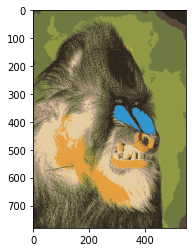

In [ ]:
plt.imshow(new_img_) #แสดงกราฟสีที่ได้